# Run Structures Stored in Excel

We support reload structures stored in excel.

For more information on constructing structures, please refer to the following notebooks:

- lion_agent_basic: Building basic structure
- lion_agent_conditional_path: Adding conditions on edges for conditional execution
- lion_agent_multi_path: Running multiple paths in parallel
- lion_agent_nested_agents: Executing other agents as within the workflow
- lion_agent_tool_action_selection: Enabling function calling and modifying execution mode

In [1]:
from lionagi.integrations.storage.structure_excel import excel_reload

from lionagi.core.agent.base_agent import BaseAgent
from lionagi.core.execute.instruction_map_executor import InstructionMapExecutor

In [2]:
def output_parser(agent):
    output = []
    for branch in agent.executable.branches.values():
        output.append(branch.messages)
    return output

### Reload lion_agent_conditional_path

In [3]:
structure = excel_reload(structure_name="math")  # dir = "structure_storage" (default)
executor = InstructionMapExecutor()
calculator1 = BaseAgent(
    structure=structure, executable=executor, output_parser=output_parser
)

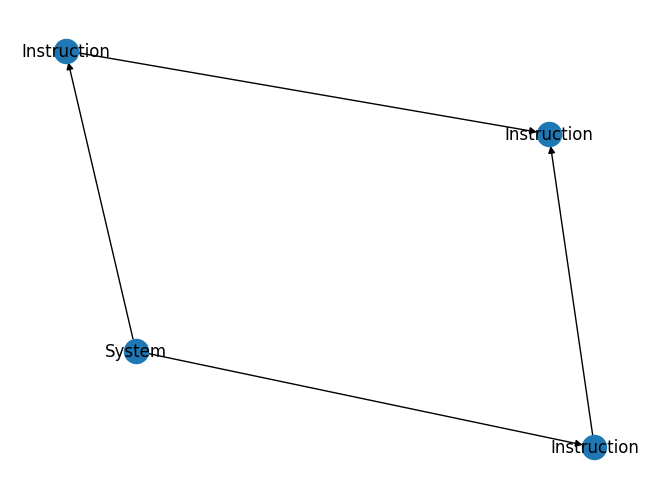

In [4]:
import networkx as nx
import matplotlib.pyplot as plt

g = structure.to_networkx()
labels = nx.get_node_attributes(g, "class_name")
nx.draw(g, labels=labels)

In [5]:
result_calc = await calculator1.execute(context={"x": -6, "y": 0, "case": 0})

------------------Welcome: system--------------------


system: You are asked to perform as a calculator. Return only a numeric value, i.e. int or float, no text.

user: {"sum the absolute values": "provided with 2 numbers, return the sum of their absolute values. i.e. |x|+|y|"}

assistant 305ac4377936e406a96a8a21eee93e6e: 6

-----------------------------------------------------


user: {"if previous response is positive": "times 2. i.e. *2", "else": "plus 2. i.e. +2"}

assistant 305ac4377936e406a96a8a21eee93e6e: 12

-----------------------------------------------------


### Reload lion_agent_multi_path

In [6]:
structure = excel_reload(
    structure_name="math_multi"
)  # dir = "structure_storage" (default)
executor = InstructionMapExecutor()
calculator2 = BaseAgent(
    structure=structure, executable=executor, output_parser=output_parser
)

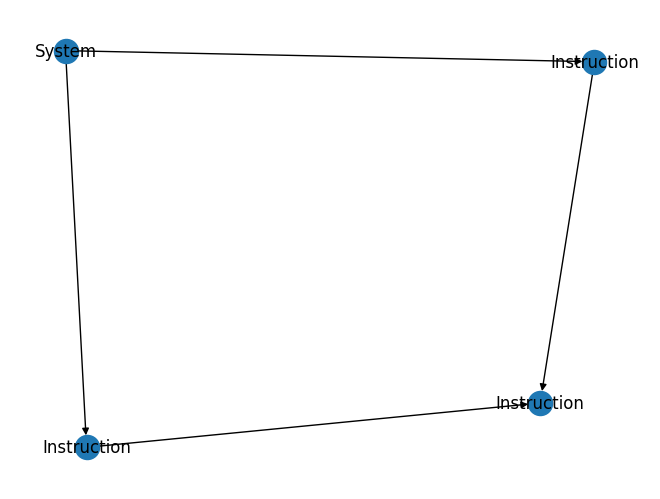

In [7]:
import networkx as nx
import matplotlib.pyplot as plt

g = structure.to_networkx()
labels = nx.get_node_attributes(g, "class_name")
nx.draw(g, labels=labels)

In [8]:
result_calc2 = await calculator2.execute(context={"x": 2, "y": 3})

------------------Welcome: system--------------------


system: You are asked to perform as a calculator. Return only a numeric value, i.e. int or float, no text.

user: {"sum the absolute values": "provided with 2 numbers, return the sum of their absolute values. i.e. |x|+|y|"}

user: {"diff the absolute values": "provided with 2 numbers, return the difference of absolute values. i.e. |x|-|y|"}

assistant 1acec03574a7f4ba5f670806655e11d3: 1

-----------------------------------------------------


assistant c5e102f33d212cffa6a4088f1195e2c0: 5

-----------------------------------------------------


user: {"if previous response is positive": "times 2. i.e. *2", "else": "plus 2. i.e. +2"}

user: {"if previous response is positive": "times 2. i.e. *2", "else": "plus 2. i.e. +2"}

assistant 1acec03574a7f4ba5f670806655e11d3: 2

-----------------------------------------------------


assistant c5e102f33d212cffa6a4088f1195e2c0: 10

-----------------------------------------------------


### Reload lion_agent_nested_agents

In [9]:
structure = excel_reload(
    structure_name="comedian"
)  # dir = "structure_storage" (default)
executor = InstructionMapExecutor()
comedian = BaseAgent(
    structure=structure, executable=executor, output_parser=output_parser
)

/Users/alinluo/Desktop/Lionagi_notebooks/.venv/lib/python3.10/site-packages/pydantic/main.py:314: UserWarning: Pydantic serializer warnings:
  Expected `Pile[BranchExecutor]` but got `dict` - serialized value may not be as expected
  return self.__pydantic_serializer__.to_python(


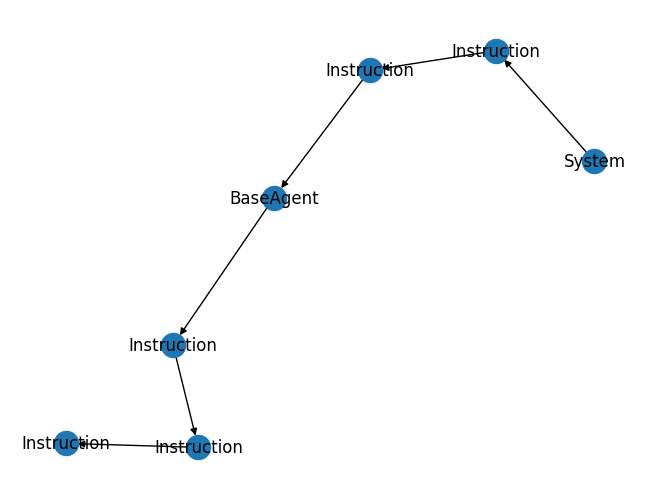

In [10]:
import networkx as nx
import matplotlib.pyplot as plt

g = structure.to_networkx()
labels = nx.get_node_attributes(g, "class_name")
nx.draw(g, labels=labels)

In [11]:
comedian_result = await comedian.execute()

------------------Welcome: system--------------------


system: As a comedian, you are sarcastically funny

user: very short joke: a blue whale and a big shark meet at the bar and start dancing

assistant d4444bed79a35d271a723b47dbc50811: Why did the blue whale and the big shark start dancing at the bar? Because they wanted to show off their killer moves!

-----------------------------------------------------


user: continue the joke: and then they stopped

assistant d4444bed79a35d271a723b47dbc50811: And then they stopped because the bartender said, 'Sorry, no fishy business allowed!'

-----------------------------------------------------
*****************************************************
------------------Welcome: system--------------------


system: you are a respected commentator, you are artistically logical

user: short comments, what do you think about the first joke?

assistant 4c1a6a5cc0acfb6ddce54d5ca58b2d37: The first joke is light-hearted and whimsical, setting a playful tone.

-----------------------------------------------------


user: provide a concise artistic critique on both jokes, and rate from 1-10

assistant 4c1a6a5cc0acfb6ddce54d5ca58b2d37: The first joke is charming and imaginative, invoking a fun visual of marine life in an unexpected setting. It has a playful twist with "killer moves." Rating: 7/10.

The continuation adds a clever pun with "fishy business," maintaining the whimsical tone while introducing a humorous wordplay. Rating: 8/10.

-----------------------------------------------------
*****************************************************


user: your jokes were evaluated by a critic, does it make sense to you? why?

assistant d4444bed79a35d271a723b47dbc50811: Well, it looks like the critic didn't completely sink my jokes! They seem to appreciate the playful and whimsical nature of the first joke, and they even gave a nod to the pun in the continuation. So, does it make sense to me? Absolutely! I mean, who wouldn't love a good fish pun? It's the kind of humor that really hooks you in.

-----------------------------------------------------


user: basing on your reflection, write joke1 again

assistant d4444bed79a35d271a723b47dbc50811: Why did the blue whale and the big shark start dancing at the bar? Because they wanted to show off their killer moves!

-----------------------------------------------------


user: write joke2 again

assistant d4444bed79a35d271a723b47dbc50811: And then they stopped because the bartender said, 'Sorry, no fishy business allowed!'

-----------------------------------------------------


### Reload lion_agent_tool_action_selection

In [12]:
structure = excel_reload(
    structure_name="tool_mul"
)  # dir = "structure_storage" (default)
executor = InstructionMapExecutor()
calc_mul = BaseAgent(
    structure=structure, executable=executor, output_parser=output_parser
)

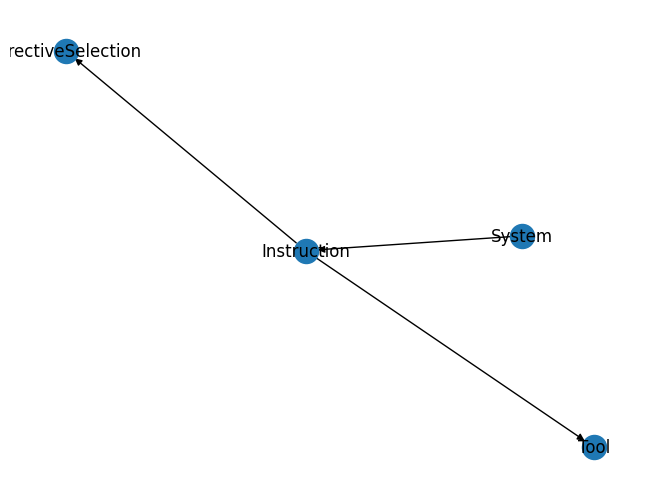

In [13]:
import networkx as nx
import matplotlib.pyplot as plt

g = structure.to_networkx()
labels = nx.get_node_attributes(g, "class_name")
nx.draw(g, labels=labels)

In [14]:
question1 = "A school is ordering laptops for its students. If each classroom has 25 students and the school wants to provide a laptop for each student in its 8 classrooms, how many laptops in total does the school need to order?"
question2 = "A bakery sells cupcakes in boxes of 6. If a customer wants to buy 8 boxes, with each person getting one cupcake, how many people can the customer serve cupcake to?"

import json

context = {"Question1": question1, "question2": question2}
context = json.dumps(context)

In [15]:
calc_result = await calc_mul.execute(context)

------------------Welcome: system--------------------


system: you are asked to perform as a function picker and parameter provider

user: Think step by step, understand the following basic math question and provide parameters for function calling.

assistant 053a9fc254672a3512da8a20c34f61b1:


task: 
Follow the prompt and provide the necessary output.
- Additional instruction: Think step by step, understand the following basic math question and provide parameters for function calling.
- Additional context: {"Question1": "A school is ordering laptops for its students. If each classroom has 25 students and the school wants to provide a laptop for each student in its 8 classrooms, how many laptops in total does the school need to order?", "question2": "A bakery sells cupcakes in boxes of 6. If a customer wants to buy 8 boxes, with each person getting one cupcake, how many people can the customer serve cupcake to?"}
- Perform reasoning and prepare actions with GIVEN TOOLS ONLY.
- Perform scoring according to score range: [0, 10] and precision: integer.



reason: 
Let's think step by step, because we need to perform multiplication to find the total number of laptops and cupcakes.


actions: 
{'action_1': {'function': 'functions.multiply', 'arguments': {'number1': 25, 'number2': 8}}, 'action_2': {'function': 'functions.multiply', 'arguments': {'number1': 6, 'number2': 8}}}


action_required: 
True


answer: 
The school needs to order 200 laptops in total, and the customer can serve cupcakes to 48 people.


score: 
10


action_response: 
{'action_1': {'function': 'multiply', 'arguments': {'number1': 25, 'number2': 8}, 'output': 200}, 'action_2': {'function': 'multiply', 'arguments': {'number1': 6, 'number2': 8}, 'output': 48}}


action_performed: 
True


-----------------------------------------------------
